In [16]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("StaticPricingDetails_2022_06_01_16_06_32.xlsx", sheet_name="Stock Days")
SKU_sales = pd.read_excel("StaticPricingDetails_2022_06_01_16_06_32.xlsx", sheet_name="US SKU Sales")
Part_sales = pd.read_excel("StaticPricingDetails_2022_06_01_16_06_32.xlsx", sheet_name="US Part Sales")
Item_category = pd.read_excel("ItemcategoryResults.xlsx")

In [5]:
df = df[["SKU", "ProductType", "OnHand", "HOT", "DOI", "US_ProductCost", "US_Price"]]
df['Profit'] = df["US_Price"] - df["US_ProductCost"]

SKU_sales['Monthly_Sales'] = SKU_sales['M1_Qty']
SKU_sales['90_Day_Sales'] = SKU_sales['M1_Qty'] + SKU_sales['M2_Qty'] + SKU_sales['M3_Qty']
SKU_sales['Yearly_Sales'] = SKU_sales.iloc[:,6:18].sum(axis=1)
SKU_sales = SKU_sales[['SKU', 'Monthly_Sales', '90_Day_Sales', 'Yearly_Sales']]

Part_sales['Monthly_Sales'] = Part_sales['M1_Qty']
Part_sales['90_Day_Sales'] = Part_sales['M1_Qty'] + Part_sales['M2_Qty'] + Part_sales['M3_Qty']
Part_sales['Yearly_Sales'] = Part_sales.iloc[:,5:17].sum(axis=1)
Part_sales = Part_sales[['SKU', 'Monthly_Sales', '90_Day_Sales', 'Yearly_Sales']]

In [6]:
df.describe()

,OnHand,HOT,DOI,US_ProductCost,US_Price,Profit
count,13005.000000,13005.00000,13005.000000,13005.000000,13005.000000,13005.000000
mean,118.049904,229.15148,345.379546,47.767509,96.502532,48.735023
std,160.314748,273.42733,1537.954795,34.312413,62.323418,29.326542
min,0.000000,1.00000,0.000000,2.030000,12.380000,-10.230000
25%,31.000000,91.00000,39.000000,22.730000,56.460000,30.340000
50%,80.000000,157.00000,85.000000,39.820000,77.710000,40.820000
75%,156.000000,278.00000,181.000000,65.260000,126.040000,60.690000
max,8596.000000,8600.00000,42200.000000,419.650000,666.340000,287.190000


In [7]:
SKU_sales.describe()

,Monthly_Sales,90_Day_Sales,Yearly_Sales
count,13005.000000,13005.000000,13005.000000
mean,5.568551,16.473895,50.586544
std,11.832277,36.131678,105.455683
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000
50%,2.000000,5.000000,18.000000
75%,6.000000,18.000000,56.000000
max,323.000000,1271.000000,4256.000000


In [8]:
Part_sales.describe()

,Monthly_Sales,90_Day_Sales,Yearly_Sales
count,5391.000000,5391.000000,5391.000000
mean,28.076238,80.923576,243.140976
std,46.481416,131.536191,336.435069
min,0.000000,0.000000,0.000000
25%,4.000000,17.000000,66.000000
50%,14.000000,43.000000,150.000000
75%,33.000000,93.500000,294.000000
max,712.000000,2192.000000,4957.000000


In [9]:
df_inventory = df[df['ProductType']=='InventoryItem']
df_inventory = pd.merge(df_inventory, Part_sales, on='SKU', how='left')

df_kit = df[df['ProductType']=='KitItem']
df_kit = pd.merge(df_kit, SKU_sales, on='SKU', how='left')

In [10]:
result = pd.concat([df_inventory, df_kit]).sort_values('SKU').reset_index(drop=True)
result.head(10)

,SKU,ProductType,OnHand,HOT,DOI,US_ProductCost,US_Price,Profit,Monthly_Sales,90_Day_Sales,Yearly_Sales
0,AC1003,InventoryItem,62,64,298,92.62,120.60,27.98,6,16,38
1,AC1016,InventoryItem,45,45,210,89.73,156.63,66.90,6,14,71
2,AC1023,InventoryItem,63,63,882,97.24,137.21,39.97,5,19,66
3,ADSKARC8005,InventoryItem,276,338,246,26.74,55.77,29.03,33,110,315
4,ADSKARC8005PR,KitItem,138,169,246,53.48,93.35,39.87,6,23,73
5,ADSKARC8008,InventoryItem,55,140,156,27.73,59.48,31.75,15,58,144
6,ADSKARC8008PR,KitItem,55,140,142,55.39,100.81,45.42,6,29,69
7,ADSKARC8018,InventoryItem,60,145,142,27.66,60.66,33.00,16,61,140
8,ADSKARC8020,InventoryItem,87,87,87,30.68,64.74,34.06,20,51,105
9,ADSKARC8020PR,KitItem,43,43,87,61.36,120.91,59.55,7,19,42


In [11]:
result.isnull().sum()

SKU               0
ProductType       0
OnHand            0
HOT               0
DOI               0
US_ProductCost    0
US_Price          0
Profit            0
Monthly_Sales     0
90_Day_Sales      0
Yearly_Sales      0
dtype: int64

In [12]:
Item_category = Item_category[['Name', 'Wms Category']]
Item_category.dropna(subset=['Wms Category'], inplace=True)
df_inventory = pd.merge(df_inventory, Item_category, how='left', left_on='SKU', right_on='Name')
df_inventory.drop(columns=['Name'], inplace=True)
df_inventory.head(10)

,SKU,ProductType,OnHand,HOT,DOI,US_ProductCost,US_Price,Profit,Monthly_Sales,90_Day_Sales,Yearly_Sales,Wms Category
0,AC1003,InventoryItem,62,64,298,92.62,120.60,27.98,6,16,38,Air Suspension Compressor
1,AC1016,InventoryItem,45,45,210,89.73,156.63,66.90,6,14,71,Air Suspension Compressor
2,AC1023,InventoryItem,63,63,882,97.24,137.21,39.97,5,19,66,Air Suspension Compressor
3,ADSKARC8005,InventoryItem,276,338,246,26.74,55.77,29.03,33,110,315,ATV Axles
4,ADSKARC8008,InventoryItem,55,140,156,27.73,59.48,31.75,15,58,144,ATV Axles
5,ADSKARC8018,InventoryItem,60,145,142,27.66,60.66,33.00,16,61,140,ATV Axles
6,ADSKARC8020,InventoryItem,87,87,87,30.68,64.74,34.06,20,51,105,ATV Axles
7,ADSKARC8030,InventoryItem,63,63,441,29.50,60.58,31.08,3,14,69,ATV Axles
8,ADSKCA9325,InventoryItem,23,23,2300,28.66,46.85,18.19,4,20,44,ATV Axles
9,ADSKCA9326,InventoryItem,20,20,280,28.46,59.37,30.91,5,22,47,ATV Axles


In [ ]:
temp = df_inventory.pivot(columns='Wms Category', values='Profit')
temp_index = temp.mean().sort_values(ascending=False).index
temp_sort = temp[temp_index]

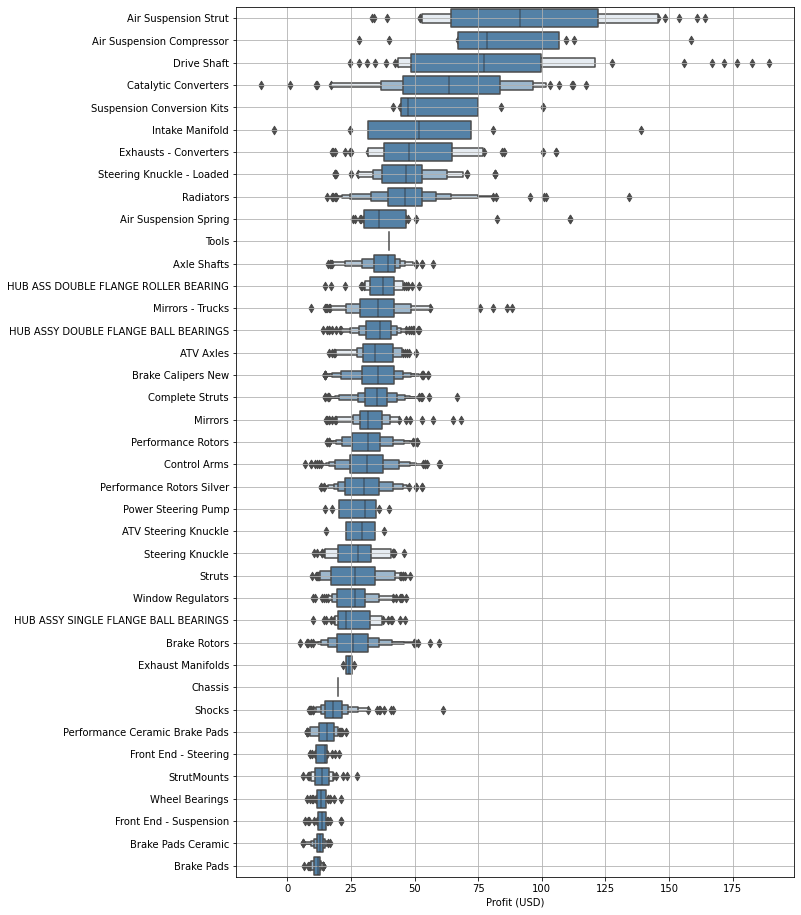

In [182]:
plt.figure(figsize=(10,16))
ax = sns.boxenplot(data=temp_sort, orient="h", color="steelblue")

ax.set(ylabel=None, xlabel="Profit (USD)")
#ax.set_title("Single Item Profit by Category", fontsize=18)
plt.grid()

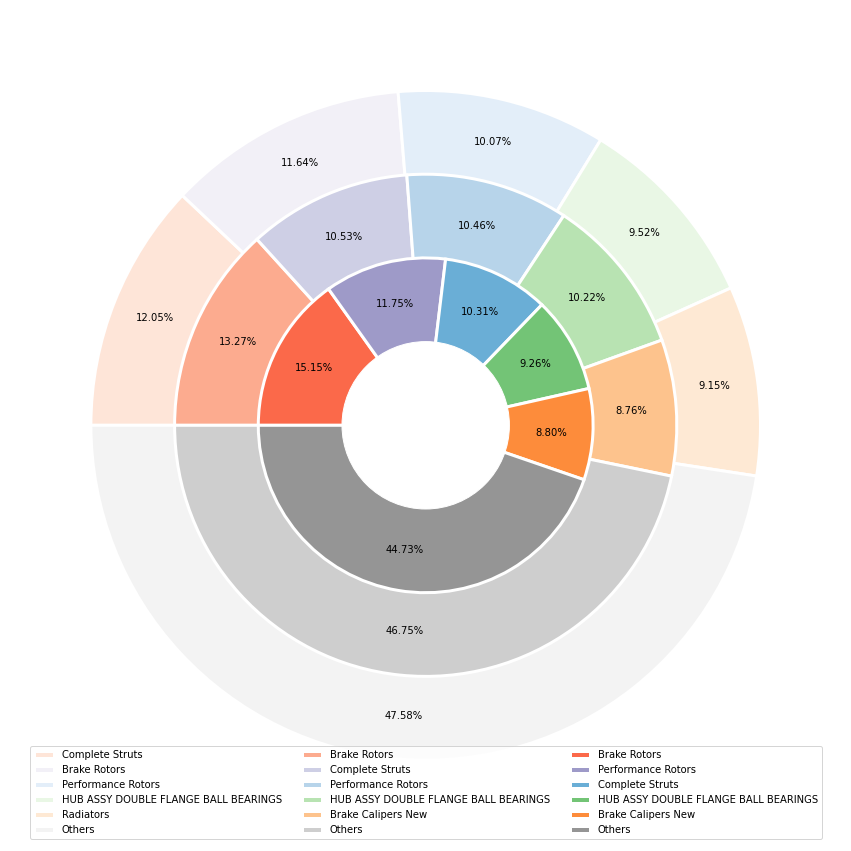

In [183]:
result_inventory = result[result['ProductType']=='InventoryItem']
result_inventory = pd.merge(result_inventory, Item_category, how='left', left_on='SKU', right_on='Name')

plt.figure(figsize=(15,18))

rad = [0.5, 0.75, 1]
pct_loc = [0.75, 0.82, 0.87]
fading = [0,0.2,0.4] 

cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Blues
cmap4 = plt.cm.Greens
cmap5 = plt.cm.Oranges
cmap6 = plt.cm.Greys
legend_to_show = []

for i in range(10,7,-1):
    result_inventory['PeriodProfit'] = result_inventory[result_inventory.columns[i]] * result_inventory['Profit']
    category_periodprofit = result_inventory.groupby('Wms Category')['PeriodProfit'].sum().reset_index(name ='Total Profit')
    category_periodprofit.sort_values('Total Profit', ascending=False, inplace=True)
    
    df = category_periodprofit[:5].copy()
    new_row = pd.DataFrame(data = {'Wms Category':['Others'], 'Total Profit':[category_periodprofit['Total Profit'][5:].sum()]})
    category_periodprofit = pd.concat([df, new_row])
    
    
    plt.pie(category_periodprofit['Total Profit'], 
            radius = rad[i-8], colors = [cmap1(.5-fading[i-8]), cmap2(.5-fading[i-8]), cmap3(.5-fading[i-8]), cmap4(.5-fading[i-8]), cmap5(.5-fading[i-8]), cmap6(.5-fading[i-8])],
            startangle=180, autopct='%1.2f%%', pctdistance=pct_loc[i-8],
            wedgeprops={'linewidth':3, 'edgecolor':'white'},
            labels=[" "]*6, labeldistance=0, 
            counterclock=False)
    
    legend_to_show.extend(category_periodprofit['Wms Category'].tolist())

my_circle=plt.Circle((0,0), 0.25, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(legend_to_show, ncol=3, loc=8, fontsize=10)
#plt.title("Sales Percentages of Top 5 Categories", fontsize=12)
plt.show()




In [218]:
result_inventory.head(10)

,SKU,ProductType,OnHand,HOT,DOI,US_ProductCost,US_Price,Profit,Monthly_Sales,90_Day_Sales,Yearly_Sales,Name,Wms Category,PeriodProfit
0,AC1003,InventoryItem,62,64,298,92.62,120.60,27.98,6,16,38,AC1003,Air Suspension Compressor,167.88
1,AC1016,InventoryItem,45,45,210,89.73,156.63,66.90,6,14,71,AC1016,Air Suspension Compressor,401.40
2,AC1023,InventoryItem,63,63,882,97.24,137.21,39.97,5,19,66,AC1023,Air Suspension Compressor,199.85
3,ADSKARC8005,InventoryItem,276,338,246,26.74,55.77,29.03,33,110,315,ADSKARC8005,ATV Axles,957.99
4,ADSKARC8008,InventoryItem,55,140,156,27.73,59.48,31.75,15,58,144,ADSKARC8008,ATV Axles,476.25
5,ADSKARC8018,InventoryItem,60,145,142,27.66,60.66,33.00,16,61,140,ADSKARC8018,ATV Axles,528.00
6,ADSKARC8020,InventoryItem,87,87,87,30.68,64.74,34.06,20,51,105,ADSKARC8020,ATV Axles,681.20
7,ADSKARC8030,InventoryItem,63,63,441,29.50,60.58,31.08,3,14,69,ADSKARC8030,ATV Axles,93.24
8,ADSKCA9325,InventoryItem,23,23,2300,28.66,46.85,18.19,4,20,44,ADSKCA9325,ATV Axles,72.76
9,ADSKCA9326,InventoryItem,20,20,280,28.46,59.37,30.91,5,22,47,ADSKCA9326,ATV Axles,154.55


In [233]:
inventory_sales = result_inventory.groupby('Wms Category').agg({'Monthly_Sales':'sum',
                                                                '90_Day_Sales':'sum',
                                                                'Yearly_Sales':'sum'}).sort_values('Monthly_Sales',ascending=False).reset_index()
inventory_sales.head(5)

,Wms Category,Monthly_Sales,90_Day_Sales,Yearly_Sales
0,Brake Rotors,24935,64899,173551
1,Brake Pads Ceramic,17522,45970,120930
2,Performance Rotors,16950,44931,127996
3,Complete Struts,13596,40713,143323
4,HUB ASSY DOUBLE FLANGE BALL BEARINGS,12048,38953,110959


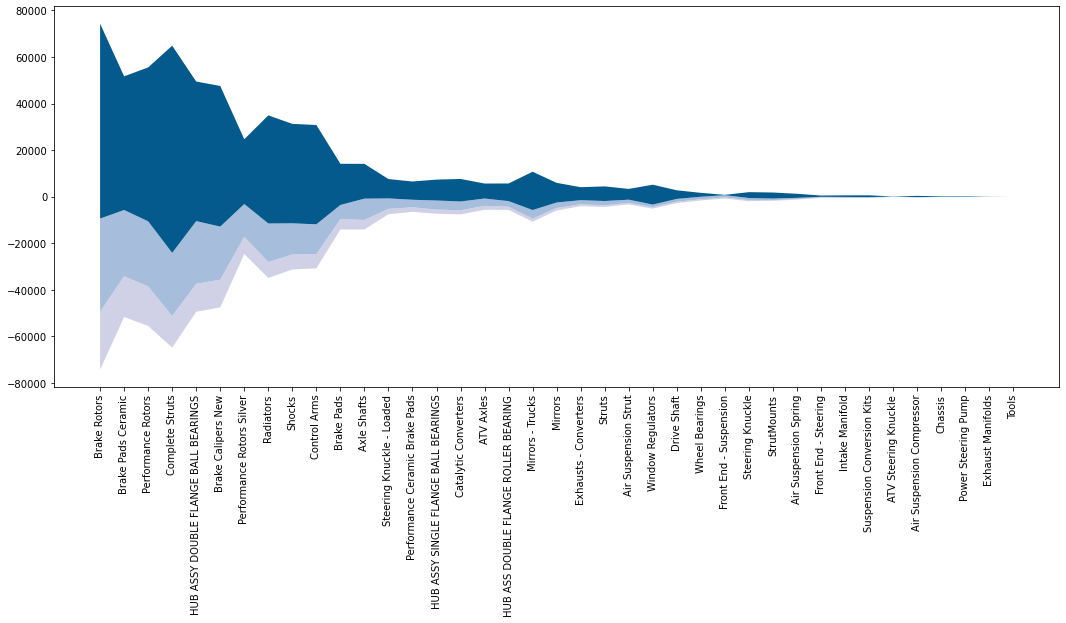

In [252]:

COLORS = ["#D0D1E6", "#A6BDDB", "#045A8D"]
fig, ax = plt.subplots(figsize=(18, 7))
ax.stackplot( inventory_sales['Wms Category'],  [inventory_sales['Monthly_Sales'], 
                                                 inventory_sales['90_Day_Sales']-inventory_sales['Monthly_Sales'], 
                                                 inventory_sales['Yearly_Sales']-inventory_sales['90_Day_Sales']-inventory_sales['Monthly_Sales']], 
            baseline='sym', colors=COLORS)

plt.xticks(rotation=90)
plt.show()